In [253]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import rm_python_lib.MechDesign.Helpers as HM
from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_, deg_, mu_m_
import rm_python_lib.MechDesign.Units.UnitMethods as UM

import rm_python_lib.MechDesign.RnM as RnM

### 1. Calculate Pulley Selection
Motor Power:
$$P=5500W$$
Motor Output Shaft Speed:
$$n_1=1500rpm$$

#### From the motor selection lab
Transmission Ratio
$$i_b=2.202$$

$$P'=K_A*P$$

In [254]:
P = 5500 * W_
b=RnM.Belt()

b.P=P
b.i=2.202
b.K_A=1.5
b.Pprime=b.K_A*b.P
HM.EqPrint('Pprime',b.Pprime)

n_1=1500 *rpm_

b.P_N=UM.RemoveUnits((b.Pprime/1000)/n_1)
HM.EqPrint('Pprime/n_1',b.P_N)


Eq(Pprime, 8250.0*W_)

Eq(Pprime/n_1, 0.0055)

Eq(Pprime/n_1, 0.0055)

Table 16-11(b):
$$P'=8250W$$
and
$$n_1=1500 > SPZ$$

Table 16-7:
$$\frac{P'}{n}=\frac{8.25}{1500}=0.0055 > d_{smallest pulley}=140mm$$

In [255]:
d_dk=140*mm_
d_dg=b.i*d_dk
b.d_dk=d_dk
b.d_dg=d_dg
HM.EqPrint('d_dg',b.d_dg)
HM.EqPrint('d_dk',b.d_dk)


Eq(d_dg, 308.3*mm_)

Eq(d_dk, 140*mm_)

Eq(d_dk, 140*mm_)

#### From Table 16-7
$$d_{dk} = 140mm$$
$$d_{dg} = 315mm$$
![](images/Table16-7.JPG)

### 2. Calculate eprime
calculate e' 16.21    
$$0.7*(d_{dg}+d_{dk}) \le e' \le 2*(d_{dg}+d_{dk})$$
#### select an init value 
$$e'=\frac{(e'_{max} + e'_{min})}{2}$$


In [256]:
b.d_dg=315*mm_
eprime_min=0.7*(b.d_dk + b.d_dg)
eprime_max=2*(b.d_dk + b.d_dg)
HM.EqPrint('eprime_min',eprime_min)
HM.EqPrint('eprime_max',eprime_max)
b.eprime=(eprime_min + eprime_max)/2

HM.EqPrint('eprime',b.eprime)
# b.eprime=UM.RemoveUnits(b.eprime)
# eprime=1.3*(b.d_dk + b.d_dg)
# HM.EqPrint('eprime',eprime)
# b.eprime=eprime

Eq(eprime_min, 318.5*mm_)

Eq(eprime_max, 910*mm_)

Eq(eprime, 614.2*mm_)

Eq(eprime, 614.2*mm_)

### 3. Calculate Lprime
$$L' = 2e'+\frac{\pi}{2}(d_{dg}+d_{dk})+\frac{(d_{dg}-d_{dk})^2}{4e'}$$

In [257]:
b.Lprime = b.E16_23_TheoreticalBeltLength().evalf()
t=HM.EqPrint('Lprime',b.Lprime)

Eq(Lprime, 1956.0*mm_)

In [258]:
b.L_d=1900*mm_
HM.EqPrint('L_d',b.L_d)
b.e = b.E16_22_FinalShaftDistance().evalf()
HM.EqPrint('e',b.e)
b.e = UM.RemoveUnits(b.e) * mm_ #this will first remove the units and then add mm again
HM.EqPrint('e',b.e)

Eq(L_d, 1900*mm_)

Eq(e, 296.3*mm_ + 289.8*mm_**1.0)

Eq(e, 586.1*mm_)

Eq(e, 586.1*mm_)

### 4. Calculate Small Pulley Wrap Angle
$$\beta_k=2*arccos(\frac{d_{dg}-d_{dk}}{2e})$$

In [259]:
#b.beta_1 = b.E16_24A_circumfranceAngle().evalf()
#HM.EqPrint('beta_1',UM.RemoveUnits(b.beta_1))
#b.beta_1*=180/np.pi*deg_
#HM.EqPrint('beta_1',b.beta_1)

pn
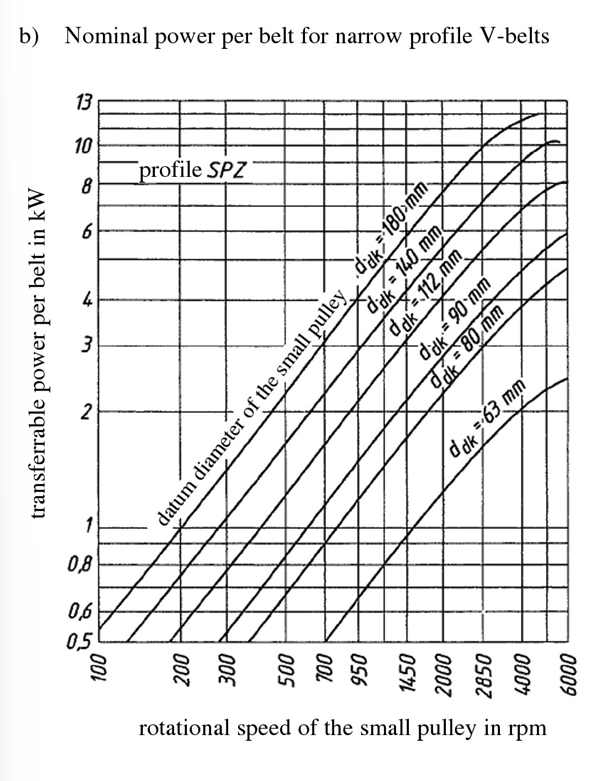
Uz
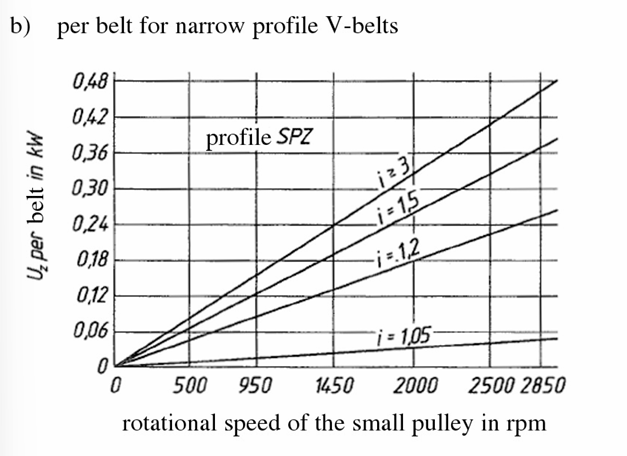
c1
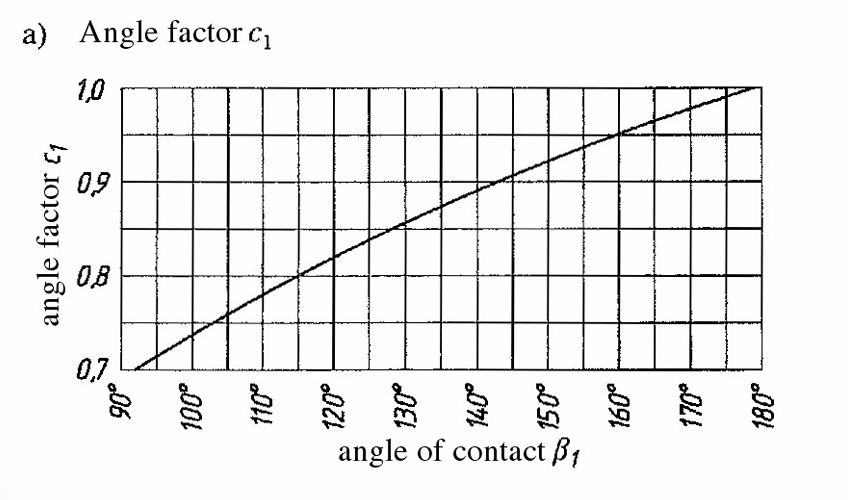
c2
![alt text](image.png)

In [260]:
b.P_N = 4300*W_  # table 16-15b  1500rpm and 140mm diameters
b.U_z = 220*W_   # table 16-16b, 1500rpm and i=2.202
b.c_1 = 0.96     # table 16-17a  beta1 163.1°
b.c_2 = 1.5     # table 16-17c SPZ 1862mm belt,
b.z = b.E16_29_NumberOfBelts()
HM.EqPrint('z',b.z)
b.zz = 2
b.d_w = b.d_dk
b.n = n_1
#help!!!
b.v = UM.All_to_SI( b.d_dk/2*b.n)
HM.EqPrint('v',b.v)
b.f_B =UM.All_to_SI( b.E16_37_BendingFrequency())
t=HM.EqPrint('f_B',b.f_B)


Eq(z, 1.268)

Eq(v, 11.0*m_/s_)

Eq(f_B, 11.57/s_)

Extend the code further to also calculate the force $F_a$ exerted on the shaft. 
- use Expression 16.6A to calculate the force $F_a$
- $F_t$ in formula 16.6A can be calculated as indicated between formulas 16.1 and 16.2: $F_t = {{2T}\over{d}}$
- make sure to use the proper expression for $\mu$ (or $\mu'$)


In [261]:
#b.mu = 0.35  #table from chatGPT,see report
b.alpha = UM.All_to_SI( 38*deg_)
b.n_1 = n_1
T  = UM.kgm_s2_to_N( UM.All_to_SI( b.Pprime / b.n_1))
print(T/0.09*2)
HM.EqPrint('T',T)
b.F_t = b.Pprime / b.v
HM.EqPrint('F_t',UM.kgm_s2_to_N( UM.All_to_SI(b.F_t)))
b.muprime = b.E16_1B_Set2muprime()   
b.mu = b.muprime
HM.EqPrint('mu',b.mu)
b.m = b.E16_3_Eytelwein()
HM.EqPrint('m',b.m)
b.F_a = UM.kgm_s2_to_N( UM.All_to_SI(b.E16_6_AxleLoad()))
t=HM.EqPrint('F_a',b.F_a)

1167.13624934057*N_*m_


Eq(T, 52.52*N_*m_)

Eq(F_t, 750.3*N_)

Eq(mu, 3.072*_mu)

Eq(m, exp(3.072*_beta_1*_mu))

Eq(F_a, 750.3*N_*(-2.0*exp(3.072*_beta_1*_mu)*cos(_beta_1) + exp(6.143*_beta_1*_mu) + 1.0)**0.5/(exp(3.072*_beta_1*_mu) - 1.0))

10 4 826.4977099669629
826.4977099669629


Eq(F_a, 750.3*N_*(-2.0*exp(3.072*_beta_1*_mu)*cos(_beta_1) + exp(6.143*_beta_1*_mu) + 1.0)**0.5/(exp(3.072*_beta_1*_mu) - 1.0))

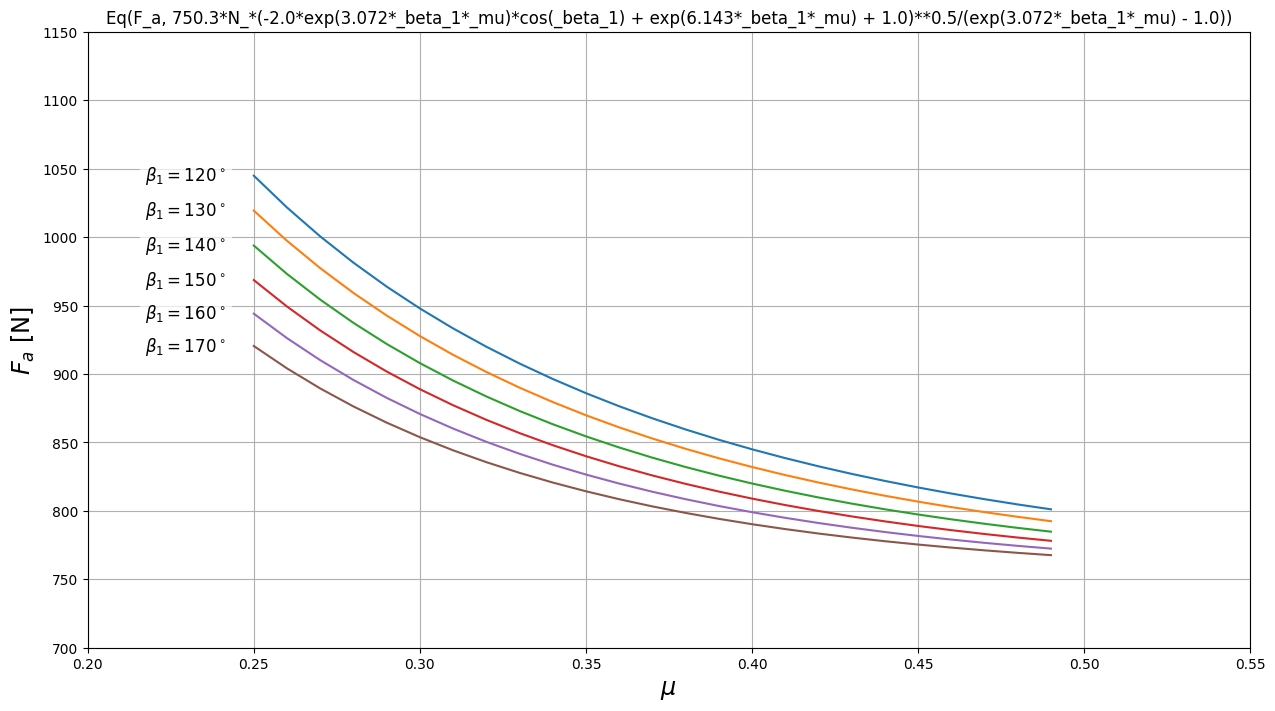

In [262]:
#polt figure of F_a, mu and beta_1
deg = np.pi / 180.0            # float
b.beta_1 = np.array([120,130,140,150,160,170], dtype=float) * deg
b.mu = np.arange(0.25,0.5,0.01)

X1 = np.asarray(b.mu, dtype=float)
X2 = np.asarray(b.beta_1, dtype=float)
symbol_X1 = 'mu'
symbol_X2 = 'beta_1'
yy, A, B = HM.evaluate(b.F_a,{symbol_X1:X1,symbol_X2:X2})  

mu_target     = 0.35
mu_index   = int(np.argmin(np.abs(b.mu - mu_target)))
mu_target     = 0.35
beta_deg_tgt  = 162.8

mu_index   = int(np.argmin(np.abs(b.mu - mu_target)))
beta_index = int(np.argmin(np.abs(b.beta_1 - beta_deg_tgt*deg)))
yy_point = yy[mu_index, beta_index]

print(mu_index, beta_index, yy_point)
print(yy_point)

# setting a textsize parameter we can re-use in different sections of the code
# setting a textsize parameter we can re-use in different sections of the code
textsize = 'xx-large'

plt.figure(figsize=(15, 8))    
# plot the results
plt.plot(X1, yy)
plt.grid(True)

# table in each line
for i in range(len(X2)):
    beta_deg = np.rad2deg(X2[i])
    label = rf'$\beta_{{1}}={beta_deg:.0f}^\circ$'
    plt.annotate(
        label,
        xy=(X1[0], yy[0, i]),              
        xytext=(-20, 0),                  
        textcoords="offset points",
        va='center', ha='right',
        size='large',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

# title
expr_latex = sp.latex(b.F_a)

#plt.title(rf'$F_a = {expr_latex}$', fontsize='xx-large')
t = HM.EqPrint('F_a', b.F_a)  
plt.title(f'{t}', fontsize='large')

plt.xlabel(r'$\mu$ ', fontsize=textsize)  
plt.ylabel(r'$F_{a}$ [N]', fontsize=textsize)

plt.xlim([0.2, 0.55])
plt.ylim([700, 1150])

plt.show()
